***
    
Demo EvoJAX for PINN (Physics-Informed Neural Network)
    
***

    Version: 2023-03-16
    
    Author : Nicholas Sung Wei Yong, Wong Jian Cheng, Ooi Chin Chun, Abhishek Gupta

    Contain:
    
    1. PINN for solving convection-diffusion equation (1D linear convection)
    
    2. Optimize PINN using CMA-ES solver in the EvoJAX framework
       -  as described in Nicholas Sung Wei Yong, Jian Cheng Wong, Pao-Hsiung Chiu, Abhishek Gupta, Chinchun Ooi, Yew-Soon Ong
       "Neuroevolution Surpasses Stochastic Gradient Descent for Physics-Informed Neural Networks" arXiv preprint arXiv:2212.07624 (2022).

# Demo

In [1]:
# choose GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# import library
import numpy as np
import time

# import problem
from convection_diffusion import get_fitness, policy # Number of parameters: 250

CMA Solver

In [2]:
from evojax.algo import CMA_ES_JAX

seed = 0
solver = CMA_ES_JAX(
         pop_size=80, init_stdev=0.05,
         param_size=policy.num_params, seed=seed)

Training

In [3]:
max_iters = 100000
num_tests = 1

loss_ls = []
t_training = []

runtime = 0
train_iters = 0
while (train_iters < max_iters) and (runtime < 60):
    start = time.time()
    # Training.
    params = solver.ask()
    scores = get_fitness(params)
    # Updates the weights through the solver
    solver.tell(fitness=scores)
    # This is the average loss of all the population of parameters
    score_avg_loss = np.mean(np.array(scores, copy=False, subok=True))
    best_params = solver.best_params
    end = time.time()
    t_training.append(end-start)
    loss_ls.append(-1*score_avg_loss)
    # update
    runtime += (end-start)
    train_iters += 1
    # print out
    print ('time = %.2fs  loss = %.2e'%(runtime, loss_ls[-1]))

time = 3.84s  loss = 5.00e-01
time = 4.73s  loss = 4.99e-01
time = 4.74s  loss = 4.98e-01
time = 4.75s  loss = 4.94e-01
time = 4.75s  loss = 4.87e-01
time = 4.76s  loss = 4.80e-01
time = 4.77s  loss = 4.71e-01
time = 4.78s  loss = 4.58e-01
time = 4.78s  loss = 4.46e-01
time = 4.79s  loss = 4.29e-01
time = 4.80s  loss = 4.14e-01
time = 4.80s  loss = 3.93e-01
time = 4.81s  loss = 3.70e-01
time = 4.82s  loss = 3.47e-01
time = 4.83s  loss = 3.32e-01
time = 4.83s  loss = 3.08e-01
time = 4.84s  loss = 2.82e-01
time = 4.85s  loss = 2.63e-01
time = 4.85s  loss = 2.54e-01
time = 4.86s  loss = 2.53e-01
time = 4.87s  loss = 2.54e-01
time = 4.88s  loss = 2.54e-01
time = 4.88s  loss = 2.58e-01
time = 4.89s  loss = 2.56e-01
time = 4.90s  loss = 2.57e-01
time = 4.90s  loss = 2.57e-01
time = 4.91s  loss = 2.58e-01
time = 4.92s  loss = 2.61e-01
time = 4.92s  loss = 2.61e-01
time = 4.93s  loss = 2.58e-01
time = 4.94s  loss = 2.62e-01
time = 4.95s  loss = 2.61e-01
time = 4.95s  loss = 2.61e-01
time = 4.9

time = 6.57s  loss = 2.54e-01
time = 6.57s  loss = 2.55e-01
time = 6.58s  loss = 2.55e-01
time = 6.59s  loss = 2.55e-01
time = 6.59s  loss = 2.53e-01
time = 6.60s  loss = 2.53e-01
time = 6.61s  loss = 2.54e-01
time = 6.61s  loss = 2.53e-01
time = 6.62s  loss = 2.54e-01
time = 6.62s  loss = 2.54e-01
time = 6.63s  loss = 2.54e-01
time = 6.64s  loss = 2.55e-01
time = 6.64s  loss = 2.54e-01
time = 6.65s  loss = 2.54e-01
time = 6.66s  loss = 2.54e-01
time = 6.66s  loss = 2.54e-01
time = 6.67s  loss = 2.53e-01
time = 6.67s  loss = 2.54e-01
time = 6.68s  loss = 2.54e-01
time = 6.69s  loss = 2.53e-01
time = 6.69s  loss = 2.54e-01
time = 6.70s  loss = 2.54e-01
time = 6.71s  loss = 2.54e-01
time = 6.71s  loss = 2.54e-01
time = 6.72s  loss = 2.54e-01
time = 6.73s  loss = 2.53e-01
time = 6.73s  loss = 2.52e-01
time = 6.74s  loss = 2.53e-01
time = 6.74s  loss = 2.53e-01
time = 6.75s  loss = 2.54e-01
time = 6.76s  loss = 2.54e-01
time = 6.76s  loss = 2.54e-01
time = 6.77s  loss = 2.54e-01
time = 6.7

time = 8.39s  loss = 2.52e-01
time = 8.40s  loss = 2.53e-01
time = 8.40s  loss = 2.51e-01
time = 8.41s  loss = 2.52e-01
time = 8.42s  loss = 2.53e-01
time = 8.42s  loss = 2.53e-01
time = 8.43s  loss = 2.52e-01
time = 8.44s  loss = 2.52e-01
time = 8.44s  loss = 2.51e-01
time = 8.45s  loss = 2.53e-01
time = 8.45s  loss = 2.53e-01
time = 8.46s  loss = 2.52e-01
time = 8.47s  loss = 2.52e-01
time = 8.47s  loss = 2.52e-01
time = 8.48s  loss = 2.52e-01
time = 8.49s  loss = 2.53e-01
time = 8.49s  loss = 2.53e-01
time = 8.50s  loss = 2.52e-01
time = 8.50s  loss = 2.52e-01
time = 8.51s  loss = 2.52e-01
time = 8.52s  loss = 2.53e-01
time = 8.52s  loss = 2.53e-01
time = 8.53s  loss = 2.52e-01
time = 8.54s  loss = 2.53e-01
time = 8.54s  loss = 2.51e-01
time = 8.55s  loss = 2.54e-01
time = 8.55s  loss = 2.52e-01
time = 8.56s  loss = 2.52e-01
time = 8.57s  loss = 2.52e-01
time = 8.57s  loss = 2.51e-01
time = 8.58s  loss = 2.52e-01
time = 8.59s  loss = 2.52e-01
time = 8.59s  loss = 2.53e-01
time = 8.6

time = 10.24s  loss = 4.10e-01
time = 10.24s  loss = 7.06e-01
time = 10.25s  loss = 4.80e-01
time = 10.25s  loss = 1.04e+00
time = 10.26s  loss = 4.83e-01
time = 10.27s  loss = 5.12e-01
time = 10.27s  loss = 4.93e-01
time = 10.28s  loss = 9.04e-01
time = 10.29s  loss = 4.50e-01
time = 10.29s  loss = 8.75e-01
time = 10.30s  loss = 5.66e-01
time = 10.30s  loss = 4.70e-01
time = 10.31s  loss = 4.42e-01
time = 10.32s  loss = 4.31e-01
time = 10.32s  loss = 4.97e-01
time = 10.33s  loss = 7.85e-01
time = 10.34s  loss = 1.25e+00
time = 10.34s  loss = 4.00e-01
time = 10.35s  loss = 8.35e-01
time = 10.35s  loss = 4.82e-01
time = 10.36s  loss = 4.68e-01
time = 10.37s  loss = 4.60e-01
time = 10.37s  loss = 7.95e-01
time = 10.38s  loss = 3.21e-01
time = 10.39s  loss = 1.56e+00
time = 10.39s  loss = 3.98e-01
time = 10.40s  loss = 4.17e-01
time = 10.40s  loss = 5.15e-01
time = 10.41s  loss = 6.08e-01
time = 10.42s  loss = 4.32e-01
time = 10.42s  loss = 7.29e-01
time = 10.43s  loss = 1.11e+00
time = 1

time = 12.07s  loss = 1.78e-01
time = 12.08s  loss = 1.80e-01
time = 12.08s  loss = 1.91e-01
time = 12.09s  loss = 1.92e-01
time = 12.10s  loss = 2.79e-01
time = 12.10s  loss = 1.88e-01
time = 12.11s  loss = 2.50e-01
time = 12.12s  loss = 2.58e-01
time = 12.12s  loss = 2.05e-01
time = 12.13s  loss = 2.28e-01
time = 12.13s  loss = 2.64e-01
time = 12.14s  loss = 2.12e-01
time = 12.15s  loss = 1.48e-01
time = 12.15s  loss = 2.18e-01
time = 12.16s  loss = 2.36e-01
time = 12.17s  loss = 2.44e-01
time = 12.17s  loss = 2.44e-01
time = 12.18s  loss = 2.44e-01
time = 12.18s  loss = 1.68e-01
time = 12.19s  loss = 2.63e-01
time = 12.20s  loss = 1.89e-01
time = 12.20s  loss = 2.73e-01
time = 12.21s  loss = 2.59e-01
time = 12.22s  loss = 1.85e-01
time = 12.22s  loss = 2.10e-01
time = 12.23s  loss = 2.22e-01
time = 12.23s  loss = 2.22e-01
time = 12.24s  loss = 1.68e-01
time = 12.25s  loss = 3.14e-01
time = 12.25s  loss = 2.29e-01
time = 12.26s  loss = 2.21e-01
time = 12.27s  loss = 1.36e-01
time = 1

time = 13.91s  loss = 1.58e-01
time = 13.92s  loss = 1.50e-01
time = 13.92s  loss = 1.26e-01
time = 13.93s  loss = 1.82e-01
time = 13.94s  loss = 1.40e-01
time = 13.94s  loss = 1.49e-01
time = 13.95s  loss = 1.76e-01
time = 13.95s  loss = 1.56e-01
time = 13.96s  loss = 1.37e-01
time = 13.97s  loss = 1.49e-01
time = 13.97s  loss = 1.17e-01
time = 13.98s  loss = 1.31e-01
time = 13.99s  loss = 2.44e-01
time = 13.99s  loss = 1.39e-01
time = 14.00s  loss = 1.35e-01
time = 14.00s  loss = 1.26e-01
time = 14.01s  loss = 1.41e-01
time = 14.02s  loss = 1.05e-01
time = 14.02s  loss = 1.35e-01
time = 14.03s  loss = 1.76e-01
time = 14.04s  loss = 1.61e-01
time = 14.04s  loss = 1.04e-01
time = 14.05s  loss = 1.35e-01
time = 14.05s  loss = 1.34e-01
time = 14.06s  loss = 9.16e-02
time = 14.07s  loss = 1.06e-01
time = 14.07s  loss = 1.53e-01
time = 14.08s  loss = 1.17e-01
time = 14.09s  loss = 1.08e-01
time = 14.09s  loss = 1.12e-01
time = 14.10s  loss = 9.62e-02
time = 14.10s  loss = 1.01e-01
time = 1

time = 15.74s  loss = 1.27e-01
time = 15.74s  loss = 1.17e-01
time = 15.75s  loss = 8.03e-02
time = 15.76s  loss = 1.14e-01
time = 15.76s  loss = 1.19e-01
time = 15.77s  loss = 1.16e-01
time = 15.78s  loss = 1.09e-01
time = 15.78s  loss = 1.09e-01
time = 15.79s  loss = 9.75e-02
time = 15.79s  loss = 9.22e-02
time = 15.80s  loss = 8.89e-02
time = 15.81s  loss = 9.44e-02
time = 15.81s  loss = 8.79e-02
time = 15.82s  loss = 1.15e-01
time = 15.83s  loss = 9.51e-02
time = 15.83s  loss = 1.10e-01
time = 15.84s  loss = 7.41e-02
time = 15.84s  loss = 1.05e-01
time = 15.85s  loss = 9.03e-02
time = 15.86s  loss = 1.00e-01
time = 15.86s  loss = 1.02e-01
time = 15.87s  loss = 8.45e-02
time = 15.88s  loss = 7.96e-02
time = 15.88s  loss = 1.16e-01
time = 15.89s  loss = 1.14e-01
time = 15.89s  loss = 8.29e-02
time = 15.90s  loss = 1.04e-01
time = 15.91s  loss = 1.05e-01
time = 15.91s  loss = 1.16e-01
time = 15.92s  loss = 9.75e-02
time = 15.93s  loss = 1.27e-01
time = 15.93s  loss = 1.10e-01
time = 1

time = 17.57s  loss = 4.98e-02
time = 17.58s  loss = 4.46e-02
time = 17.58s  loss = 4.95e-02
time = 17.59s  loss = 3.79e-02
time = 17.60s  loss = 3.75e-02
time = 17.60s  loss = 4.43e-02
time = 17.61s  loss = 3.63e-02
time = 17.61s  loss = 4.77e-02
time = 17.62s  loss = 4.19e-02
time = 17.63s  loss = 4.31e-02
time = 17.63s  loss = 4.67e-02
time = 17.64s  loss = 4.61e-02
time = 17.65s  loss = 4.06e-02
time = 17.65s  loss = 4.17e-02
time = 17.66s  loss = 4.45e-02
time = 17.66s  loss = 3.40e-02
time = 17.67s  loss = 3.71e-02
time = 17.68s  loss = 3.31e-02
time = 17.68s  loss = 4.13e-02
time = 17.69s  loss = 4.53e-02
time = 17.70s  loss = 3.86e-02
time = 17.70s  loss = 4.25e-02
time = 17.71s  loss = 3.51e-02
time = 17.71s  loss = 4.76e-02
time = 17.72s  loss = 3.77e-02
time = 17.73s  loss = 3.30e-02
time = 17.73s  loss = 3.73e-02
time = 17.74s  loss = 4.04e-02
time = 17.75s  loss = 4.12e-02
time = 17.75s  loss = 4.52e-02
time = 17.76s  loss = 4.12e-02
time = 17.76s  loss = 3.97e-02
time = 1

time = 19.41s  loss = 3.57e-02
time = 19.41s  loss = 2.70e-02
time = 19.42s  loss = 3.02e-02
time = 19.43s  loss = 2.86e-02
time = 19.44s  loss = 3.25e-02
time = 19.44s  loss = 2.45e-02
time = 19.45s  loss = 2.39e-02
time = 19.46s  loss = 2.28e-02
time = 19.46s  loss = 3.33e-02
time = 19.47s  loss = 2.56e-02
time = 19.47s  loss = 2.37e-02
time = 19.48s  loss = 3.67e-02
time = 19.49s  loss = 3.22e-02
time = 19.49s  loss = 3.21e-02
time = 19.50s  loss = 3.86e-02
time = 19.51s  loss = 3.66e-02
time = 19.51s  loss = 3.18e-02
time = 19.52s  loss = 3.02e-02
time = 19.52s  loss = 3.41e-02
time = 19.53s  loss = 3.98e-02
time = 19.54s  loss = 3.37e-02
time = 19.54s  loss = 3.75e-02
time = 19.55s  loss = 3.17e-02
time = 19.56s  loss = 3.10e-02
time = 19.57s  loss = 3.11e-02
time = 19.57s  loss = 3.68e-02
time = 19.58s  loss = 3.48e-02
time = 19.58s  loss = 2.52e-02
time = 19.59s  loss = 2.86e-02
time = 19.60s  loss = 3.46e-02
time = 19.60s  loss = 2.90e-02
time = 19.61s  loss = 2.83e-02
time = 1

time = 21.23s  loss = 1.17e-02
time = 21.23s  loss = 1.43e-02
time = 21.24s  loss = 1.26e-02
time = 21.24s  loss = 1.35e-02
time = 21.25s  loss = 1.27e-02
time = 21.26s  loss = 1.28e-02
time = 21.26s  loss = 1.28e-02
time = 21.27s  loss = 1.32e-02
time = 21.28s  loss = 1.42e-02
time = 21.28s  loss = 1.36e-02
time = 21.29s  loss = 1.30e-02
time = 21.29s  loss = 1.41e-02
time = 21.30s  loss = 1.13e-02
time = 21.31s  loss = 1.39e-02
time = 21.31s  loss = 1.21e-02
time = 21.32s  loss = 1.17e-02
time = 21.33s  loss = 1.06e-02
time = 21.33s  loss = 1.13e-02
time = 21.34s  loss = 1.10e-02
time = 21.35s  loss = 1.17e-02
time = 21.35s  loss = 9.69e-03
time = 21.36s  loss = 1.38e-02
time = 21.37s  loss = 1.19e-02
time = 21.37s  loss = 1.26e-02
time = 21.38s  loss = 1.01e-02
time = 21.38s  loss = 1.16e-02
time = 21.39s  loss = 1.15e-02
time = 21.40s  loss = 9.36e-03
time = 21.40s  loss = 1.14e-02
time = 21.41s  loss = 1.20e-02
time = 21.42s  loss = 1.16e-02
time = 21.43s  loss = 1.12e-02
time = 2

time = 23.05s  loss = 9.29e-03
time = 23.06s  loss = 9.48e-03
time = 23.06s  loss = 9.80e-03
time = 23.07s  loss = 9.26e-03
time = 23.08s  loss = 8.42e-03
time = 23.08s  loss = 1.12e-02
time = 23.09s  loss = 9.46e-03
time = 23.09s  loss = 1.09e-02
time = 23.10s  loss = 1.06e-02
time = 23.11s  loss = 8.83e-03
time = 23.11s  loss = 9.05e-03
time = 23.12s  loss = 1.04e-02
time = 23.13s  loss = 1.20e-02
time = 23.13s  loss = 9.11e-03
time = 23.14s  loss = 8.84e-03
time = 23.14s  loss = 1.00e-02
time = 23.15s  loss = 1.09e-02
time = 23.16s  loss = 1.15e-02
time = 23.16s  loss = 9.55e-03
time = 23.17s  loss = 9.82e-03
time = 23.18s  loss = 9.74e-03
time = 23.18s  loss = 1.08e-02
time = 23.19s  loss = 1.15e-02
time = 23.19s  loss = 1.15e-02
time = 23.20s  loss = 1.32e-02
time = 23.21s  loss = 1.01e-02
time = 23.21s  loss = 9.34e-03
time = 23.22s  loss = 1.19e-02
time = 23.23s  loss = 1.06e-02
time = 23.23s  loss = 1.11e-02
time = 23.24s  loss = 1.23e-02
time = 23.24s  loss = 1.10e-02
time = 2

time = 24.89s  loss = 7.14e-03
time = 24.89s  loss = 5.04e-03
time = 24.90s  loss = 6.22e-03
time = 24.91s  loss = 5.99e-03
time = 24.91s  loss = 7.17e-03
time = 24.92s  loss = 6.14e-03
time = 24.93s  loss = 6.49e-03
time = 24.93s  loss = 5.89e-03
time = 24.94s  loss = 6.00e-03
time = 24.94s  loss = 5.96e-03
time = 24.95s  loss = 6.61e-03
time = 24.96s  loss = 5.40e-03
time = 24.96s  loss = 5.44e-03
time = 24.97s  loss = 6.83e-03
time = 24.98s  loss = 6.05e-03
time = 24.98s  loss = 5.48e-03
time = 24.99s  loss = 6.63e-03
time = 24.99s  loss = 5.34e-03
time = 25.00s  loss = 6.42e-03
time = 25.01s  loss = 5.41e-03
time = 25.01s  loss = 5.16e-03
time = 25.02s  loss = 6.65e-03
time = 25.03s  loss = 6.50e-03
time = 25.03s  loss = 6.25e-03
time = 25.04s  loss = 5.73e-03
time = 25.04s  loss = 5.37e-03
time = 25.05s  loss = 5.05e-03
time = 25.06s  loss = 4.78e-03
time = 25.06s  loss = 6.01e-03
time = 25.07s  loss = 5.94e-03
time = 25.08s  loss = 6.02e-03
time = 25.08s  loss = 4.32e-03
time = 2

time = 26.73s  loss = 2.80e-03
time = 26.74s  loss = 2.53e-03
time = 26.75s  loss = 2.69e-03
time = 26.75s  loss = 2.59e-03
time = 26.76s  loss = 2.31e-03
time = 26.77s  loss = 2.85e-03
time = 26.77s  loss = 2.39e-03
time = 26.78s  loss = 2.50e-03
time = 26.79s  loss = 2.33e-03
time = 26.79s  loss = 2.45e-03
time = 26.80s  loss = 2.60e-03
time = 26.80s  loss = 2.43e-03
time = 26.81s  loss = 2.24e-03
time = 26.82s  loss = 2.43e-03
time = 26.82s  loss = 2.72e-03
time = 26.83s  loss = 2.66e-03
time = 26.84s  loss = 2.38e-03
time = 26.84s  loss = 1.94e-03
time = 26.85s  loss = 2.50e-03
time = 26.85s  loss = 2.51e-03
time = 26.86s  loss = 2.42e-03
time = 26.87s  loss = 2.19e-03
time = 26.87s  loss = 2.49e-03
time = 26.88s  loss = 2.25e-03
time = 26.88s  loss = 2.10e-03
time = 26.89s  loss = 2.37e-03
time = 26.90s  loss = 2.51e-03
time = 26.90s  loss = 2.58e-03
time = 26.91s  loss = 2.85e-03
time = 26.92s  loss = 2.77e-03
time = 26.92s  loss = 2.32e-03
time = 26.93s  loss = 1.93e-03
time = 2

time = 28.57s  loss = 8.41e-04
time = 28.58s  loss = 8.98e-04
time = 28.58s  loss = 9.22e-04
time = 28.59s  loss = 8.77e-04
time = 28.59s  loss = 8.38e-04
time = 28.60s  loss = 9.10e-04
time = 28.61s  loss = 1.03e-03
time = 28.61s  loss = 8.99e-04
time = 28.62s  loss = 7.92e-04
time = 28.63s  loss = 8.65e-04
time = 28.63s  loss = 8.62e-04
time = 28.64s  loss = 8.39e-04
time = 28.64s  loss = 9.22e-04
time = 28.65s  loss = 8.06e-04
time = 28.66s  loss = 8.51e-04
time = 28.66s  loss = 8.99e-04
time = 28.67s  loss = 8.68e-04
time = 28.68s  loss = 7.68e-04
time = 28.68s  loss = 8.14e-04
time = 28.69s  loss = 7.34e-04
time = 28.69s  loss = 7.54e-04
time = 28.70s  loss = 7.78e-04
time = 28.71s  loss = 8.01e-04
time = 28.71s  loss = 7.41e-04
time = 28.72s  loss = 7.61e-04
time = 28.73s  loss = 8.72e-04
time = 28.73s  loss = 8.14e-04
time = 28.74s  loss = 8.38e-04
time = 28.74s  loss = 7.27e-04
time = 28.75s  loss = 8.01e-04
time = 28.76s  loss = 8.37e-04
time = 28.76s  loss = 7.56e-04
time = 2

time = 30.40s  loss = 3.92e-04
time = 30.41s  loss = 3.83e-04
time = 30.41s  loss = 3.88e-04
time = 30.42s  loss = 3.46e-04
time = 30.43s  loss = 3.71e-04
time = 30.43s  loss = 2.98e-04
time = 30.44s  loss = 3.61e-04
time = 30.45s  loss = 3.62e-04
time = 30.45s  loss = 3.55e-04
time = 30.46s  loss = 3.35e-04
time = 30.46s  loss = 3.67e-04
time = 30.47s  loss = 3.58e-04
time = 30.48s  loss = 3.31e-04
time = 30.48s  loss = 3.82e-04
time = 30.49s  loss = 3.20e-04
time = 30.50s  loss = 3.44e-04
time = 30.50s  loss = 4.00e-04
time = 30.51s  loss = 3.27e-04
time = 30.51s  loss = 2.99e-04
time = 30.52s  loss = 3.12e-04
time = 30.53s  loss = 3.22e-04
time = 30.53s  loss = 3.01e-04
time = 30.54s  loss = 3.25e-04
time = 30.55s  loss = 3.19e-04
time = 30.55s  loss = 3.38e-04
time = 30.56s  loss = 2.99e-04
time = 30.57s  loss = 3.10e-04
time = 30.57s  loss = 2.72e-04
time = 30.58s  loss = 3.50e-04
time = 30.58s  loss = 3.17e-04
time = 30.59s  loss = 3.20e-04
time = 30.60s  loss = 2.97e-04
time = 3

time = 32.22s  loss = 1.41e-04
time = 32.22s  loss = 1.59e-04
time = 32.23s  loss = 1.59e-04
time = 32.24s  loss = 1.48e-04
time = 32.24s  loss = 1.53e-04
time = 32.25s  loss = 1.70e-04
time = 32.26s  loss = 1.49e-04
time = 32.26s  loss = 1.34e-04
time = 32.27s  loss = 1.49e-04
time = 32.28s  loss = 1.62e-04
time = 32.28s  loss = 1.51e-04
time = 32.29s  loss = 1.49e-04
time = 32.30s  loss = 1.46e-04
time = 32.30s  loss = 1.49e-04
time = 32.31s  loss = 1.49e-04
time = 32.31s  loss = 1.58e-04
time = 32.32s  loss = 1.71e-04
time = 32.33s  loss = 1.57e-04
time = 32.33s  loss = 1.60e-04
time = 32.34s  loss = 1.58e-04
time = 32.35s  loss = 1.51e-04
time = 32.35s  loss = 1.60e-04
time = 32.36s  loss = 1.62e-04
time = 32.37s  loss = 1.50e-04
time = 32.37s  loss = 1.62e-04
time = 32.38s  loss = 1.42e-04
time = 32.38s  loss = 1.61e-04
time = 32.39s  loss = 1.45e-04
time = 32.40s  loss = 1.50e-04
time = 32.40s  loss = 1.44e-04
time = 32.41s  loss = 1.60e-04
time = 32.42s  loss = 1.45e-04
time = 3

time = 34.04s  loss = 9.21e-05
time = 34.05s  loss = 9.74e-05
time = 34.06s  loss = 1.00e-04
time = 34.06s  loss = 1.01e-04
time = 34.07s  loss = 1.00e-04
time = 34.07s  loss = 9.13e-05
time = 34.08s  loss = 9.72e-05
time = 34.09s  loss = 9.49e-05
time = 34.09s  loss = 8.94e-05
time = 34.10s  loss = 9.37e-05
time = 34.11s  loss = 9.10e-05
time = 34.11s  loss = 9.28e-05
time = 34.12s  loss = 8.73e-05
time = 34.13s  loss = 9.25e-05
time = 34.13s  loss = 8.57e-05
time = 34.14s  loss = 8.51e-05
time = 34.14s  loss = 9.69e-05
time = 34.15s  loss = 9.25e-05
time = 34.16s  loss = 9.51e-05
time = 34.16s  loss = 9.73e-05
time = 34.17s  loss = 9.03e-05
time = 34.18s  loss = 9.07e-05
time = 34.18s  loss = 9.07e-05
time = 34.19s  loss = 9.39e-05
time = 34.19s  loss = 9.44e-05
time = 34.20s  loss = 9.23e-05
time = 34.21s  loss = 9.59e-05
time = 34.21s  loss = 9.95e-05
time = 34.22s  loss = 9.11e-05
time = 34.23s  loss = 9.46e-05
time = 34.23s  loss = 9.08e-05
time = 34.24s  loss = 8.72e-05
time = 3

time = 35.86s  loss = 7.15e-05
time = 35.87s  loss = 7.26e-05
time = 35.88s  loss = 7.31e-05
time = 35.88s  loss = 7.45e-05
time = 35.89s  loss = 7.12e-05
time = 35.90s  loss = 7.16e-05
time = 35.90s  loss = 6.92e-05
time = 35.91s  loss = 6.81e-05
time = 35.92s  loss = 7.28e-05
time = 35.92s  loss = 6.61e-05
time = 35.93s  loss = 7.04e-05
time = 35.93s  loss = 6.53e-05
time = 35.94s  loss = 6.94e-05
time = 35.95s  loss = 6.92e-05
time = 35.95s  loss = 7.17e-05
time = 35.96s  loss = 6.99e-05
time = 35.97s  loss = 6.74e-05
time = 35.97s  loss = 7.24e-05
time = 35.98s  loss = 7.05e-05
time = 35.98s  loss = 6.79e-05
time = 35.99s  loss = 7.17e-05
time = 36.00s  loss = 7.27e-05
time = 36.00s  loss = 6.84e-05
time = 36.01s  loss = 7.38e-05
time = 36.02s  loss = 7.23e-05
time = 36.02s  loss = 7.08e-05
time = 36.03s  loss = 7.16e-05
time = 36.03s  loss = 7.22e-05
time = 36.04s  loss = 7.13e-05
time = 36.05s  loss = 7.29e-05
time = 36.05s  loss = 7.20e-05
time = 36.06s  loss = 6.88e-05
time = 3

time = 37.68s  loss = 5.86e-05
time = 37.69s  loss = 5.60e-05
time = 37.69s  loss = 5.55e-05
time = 37.70s  loss = 5.48e-05
time = 37.71s  loss = 5.76e-05
time = 37.71s  loss = 5.75e-05
time = 37.72s  loss = 5.82e-05
time = 37.72s  loss = 5.93e-05
time = 37.73s  loss = 5.78e-05
time = 37.74s  loss = 5.84e-05
time = 37.74s  loss = 5.62e-05
time = 37.75s  loss = 5.95e-05
time = 37.76s  loss = 5.54e-05
time = 37.76s  loss = 5.78e-05
time = 37.77s  loss = 5.82e-05
time = 37.77s  loss = 5.50e-05
time = 37.78s  loss = 5.70e-05
time = 37.79s  loss = 5.90e-05
time = 37.79s  loss = 5.71e-05
time = 37.80s  loss = 5.85e-05
time = 37.81s  loss = 5.68e-05
time = 37.81s  loss = 5.48e-05
time = 37.82s  loss = 5.97e-05
time = 37.82s  loss = 5.83e-05
time = 37.83s  loss = 5.67e-05
time = 37.84s  loss = 5.57e-05
time = 37.84s  loss = 5.80e-05
time = 37.85s  loss = 5.84e-05
time = 37.86s  loss = 5.72e-05
time = 37.86s  loss = 5.52e-05
time = 37.87s  loss = 5.62e-05
time = 37.87s  loss = 5.46e-05
time = 3

time = 39.50s  loss = 4.71e-05
time = 39.50s  loss = 4.80e-05
time = 39.51s  loss = 4.96e-05
time = 39.52s  loss = 4.84e-05
time = 39.52s  loss = 4.88e-05
time = 39.53s  loss = 4.78e-05
time = 39.54s  loss = 4.83e-05
time = 39.54s  loss = 5.01e-05
time = 39.55s  loss = 4.53e-05
time = 39.55s  loss = 4.74e-05
time = 39.56s  loss = 5.21e-05
time = 39.57s  loss = 4.86e-05
time = 39.57s  loss = 4.80e-05
time = 39.58s  loss = 5.01e-05
time = 39.59s  loss = 5.03e-05
time = 39.59s  loss = 4.71e-05
time = 39.60s  loss = 4.72e-05
time = 39.60s  loss = 4.95e-05
time = 39.61s  loss = 4.69e-05
time = 39.62s  loss = 4.67e-05
time = 39.62s  loss = 4.93e-05
time = 39.63s  loss = 4.95e-05
time = 39.64s  loss = 4.72e-05
time = 39.64s  loss = 4.89e-05
time = 39.65s  loss = 4.45e-05
time = 39.65s  loss = 4.76e-05
time = 39.66s  loss = 4.65e-05
time = 39.67s  loss = 4.68e-05
time = 39.67s  loss = 4.61e-05
time = 39.68s  loss = 4.62e-05
time = 39.69s  loss = 4.62e-05
time = 39.69s  loss = 4.75e-05
time = 3

time = 41.32s  loss = 4.15e-05
time = 41.33s  loss = 4.07e-05
time = 41.33s  loss = 3.98e-05
time = 41.34s  loss = 3.96e-05
time = 41.35s  loss = 4.15e-05
time = 41.35s  loss = 4.12e-05
time = 41.36s  loss = 3.93e-05
time = 41.36s  loss = 3.90e-05
time = 41.37s  loss = 4.04e-05
time = 41.38s  loss = 3.86e-05
time = 41.38s  loss = 4.03e-05
time = 41.39s  loss = 4.12e-05
time = 41.40s  loss = 4.26e-05
time = 41.40s  loss = 3.91e-05
time = 41.41s  loss = 3.99e-05
time = 41.41s  loss = 3.87e-05
time = 41.42s  loss = 4.12e-05
time = 41.43s  loss = 3.93e-05
time = 41.43s  loss = 3.90e-05
time = 41.44s  loss = 3.98e-05
time = 41.45s  loss = 3.83e-05
time = 41.45s  loss = 3.77e-05
time = 41.46s  loss = 3.73e-05
time = 41.47s  loss = 3.71e-05
time = 41.47s  loss = 3.88e-05
time = 41.48s  loss = 4.14e-05
time = 41.48s  loss = 3.64e-05
time = 41.49s  loss = 3.95e-05
time = 41.50s  loss = 3.83e-05
time = 41.50s  loss = 3.76e-05
time = 41.51s  loss = 3.76e-05
time = 41.52s  loss = 3.70e-05
time = 4

time = 43.14s  loss = 2.83e-05
time = 43.14s  loss = 2.66e-05
time = 43.15s  loss = 2.70e-05
time = 43.16s  loss = 2.75e-05
time = 43.16s  loss = 2.73e-05
time = 43.17s  loss = 2.74e-05
time = 43.17s  loss = 2.60e-05
time = 43.18s  loss = 2.70e-05
time = 43.19s  loss = 2.65e-05
time = 43.19s  loss = 2.73e-05
time = 43.20s  loss = 2.65e-05
time = 43.21s  loss = 2.73e-05
time = 43.21s  loss = 2.78e-05
time = 43.22s  loss = 2.76e-05
time = 43.22s  loss = 2.64e-05
time = 43.23s  loss = 2.78e-05
time = 43.24s  loss = 2.59e-05
time = 43.24s  loss = 2.61e-05
time = 43.25s  loss = 2.72e-05
time = 43.26s  loss = 2.66e-05
time = 43.26s  loss = 2.62e-05
time = 43.27s  loss = 2.76e-05
time = 43.27s  loss = 2.65e-05
time = 43.28s  loss = 2.58e-05
time = 43.29s  loss = 2.72e-05
time = 43.29s  loss = 2.69e-05
time = 43.30s  loss = 2.60e-05
time = 43.31s  loss = 2.68e-05
time = 43.31s  loss = 2.67e-05
time = 43.32s  loss = 2.63e-05
time = 43.33s  loss = 2.56e-05
time = 43.33s  loss = 2.63e-05
time = 4

time = 44.95s  loss = 2.13e-05
time = 44.96s  loss = 2.18e-05
time = 44.96s  loss = 2.19e-05
time = 44.97s  loss = 2.06e-05
time = 44.97s  loss = 2.04e-05
time = 44.98s  loss = 2.09e-05
time = 44.99s  loss = 2.11e-05
time = 44.99s  loss = 2.18e-05
time = 45.00s  loss = 2.08e-05
time = 45.01s  loss = 2.01e-05
time = 45.01s  loss = 2.10e-05
time = 45.02s  loss = 2.12e-05
time = 45.02s  loss = 2.10e-05
time = 45.03s  loss = 2.03e-05
time = 45.04s  loss = 2.06e-05
time = 45.04s  loss = 2.02e-05
time = 45.05s  loss = 2.05e-05
time = 45.06s  loss = 2.07e-05
time = 45.06s  loss = 2.05e-05
time = 45.07s  loss = 2.02e-05
time = 45.07s  loss = 2.12e-05
time = 45.08s  loss = 2.08e-05
time = 45.09s  loss = 2.11e-05
time = 45.09s  loss = 2.10e-05
time = 45.10s  loss = 2.09e-05
time = 45.11s  loss = 2.01e-05
time = 45.12s  loss = 2.06e-05
time = 45.12s  loss = 2.12e-05
time = 45.13s  loss = 2.03e-05
time = 45.13s  loss = 2.08e-05
time = 45.14s  loss = 2.07e-05
time = 45.15s  loss = 2.02e-05
time = 4

time = 46.77s  loss = 1.97e-05
time = 46.78s  loss = 1.96e-05
time = 46.79s  loss = 1.92e-05
time = 46.79s  loss = 1.93e-05
time = 46.80s  loss = 2.04e-05
time = 46.81s  loss = 2.00e-05
time = 46.81s  loss = 2.04e-05
time = 46.82s  loss = 1.98e-05
time = 46.82s  loss = 1.91e-05
time = 46.83s  loss = 1.97e-05
time = 46.84s  loss = 2.01e-05
time = 46.84s  loss = 1.95e-05
time = 46.85s  loss = 1.94e-05
time = 46.86s  loss = 1.90e-05
time = 46.86s  loss = 1.94e-05
time = 46.87s  loss = 1.99e-05
time = 46.88s  loss = 1.89e-05
time = 46.88s  loss = 1.92e-05
time = 46.89s  loss = 1.90e-05
time = 46.90s  loss = 1.83e-05
time = 46.91s  loss = 1.95e-05
time = 46.92s  loss = 1.86e-05
time = 46.92s  loss = 1.96e-05
time = 46.93s  loss = 2.05e-05
time = 46.94s  loss = 1.87e-05
time = 46.94s  loss = 1.89e-05
time = 46.95s  loss = 1.91e-05
time = 46.95s  loss = 1.85e-05
time = 46.96s  loss = 1.90e-05
time = 46.97s  loss = 1.93e-05
time = 46.97s  loss = 2.00e-05
time = 46.98s  loss = 1.93e-05
time = 4

time = 48.60s  loss = 1.77e-05
time = 48.61s  loss = 1.72e-05
time = 48.61s  loss = 1.75e-05
time = 48.62s  loss = 1.73e-05
time = 48.62s  loss = 1.72e-05
time = 48.63s  loss = 1.72e-05
time = 48.64s  loss = 1.79e-05
time = 48.64s  loss = 1.76e-05
time = 48.65s  loss = 1.72e-05
time = 48.66s  loss = 1.88e-05
time = 48.66s  loss = 1.78e-05
time = 48.67s  loss = 1.88e-05
time = 48.67s  loss = 1.82e-05
time = 48.68s  loss = 1.99e-05
time = 48.69s  loss = 1.64e-05
time = 48.69s  loss = 1.78e-05
time = 48.70s  loss = 1.73e-05
time = 48.71s  loss = 1.80e-05
time = 48.71s  loss = 1.75e-05
time = 48.72s  loss = 1.79e-05
time = 48.72s  loss = 1.74e-05
time = 48.73s  loss = 1.77e-05
time = 48.74s  loss = 1.77e-05
time = 48.74s  loss = 1.74e-05
time = 48.75s  loss = 1.70e-05
time = 48.76s  loss = 1.85e-05
time = 48.76s  loss = 1.71e-05
time = 48.77s  loss = 1.65e-05
time = 48.77s  loss = 1.68e-05
time = 48.78s  loss = 1.68e-05
time = 48.79s  loss = 1.80e-05
time = 48.79s  loss = 1.77e-05
time = 4

time = 50.41s  loss = 1.41e-05
time = 50.42s  loss = 1.47e-05
time = 50.42s  loss = 1.43e-05
time = 50.43s  loss = 1.45e-05
time = 50.43s  loss = 1.52e-05
time = 50.44s  loss = 1.36e-05
time = 50.45s  loss = 1.50e-05
time = 50.45s  loss = 1.50e-05
time = 50.46s  loss = 1.47e-05
time = 50.47s  loss = 1.41e-05
time = 50.47s  loss = 1.47e-05
time = 50.48s  loss = 1.36e-05
time = 50.49s  loss = 1.46e-05
time = 50.50s  loss = 1.43e-05
time = 50.50s  loss = 1.36e-05
time = 50.51s  loss = 1.37e-05
time = 50.52s  loss = 1.38e-05
time = 50.52s  loss = 1.39e-05
time = 50.53s  loss = 1.43e-05
time = 50.54s  loss = 1.48e-05
time = 50.54s  loss = 1.41e-05
time = 50.55s  loss = 1.54e-05
time = 50.56s  loss = 1.35e-05
time = 50.56s  loss = 1.48e-05
time = 50.57s  loss = 1.40e-05
time = 50.58s  loss = 1.46e-05
time = 50.58s  loss = 1.45e-05
time = 50.59s  loss = 1.40e-05
time = 50.60s  loss = 1.53e-05
time = 50.60s  loss = 1.46e-05
time = 50.61s  loss = 1.51e-05
time = 50.62s  loss = 1.45e-05
time = 5

time = 52.23s  loss = 1.27e-05
time = 52.23s  loss = 1.36e-05
time = 52.24s  loss = 1.36e-05
time = 52.24s  loss = 1.27e-05
time = 52.25s  loss = 1.33e-05
time = 52.26s  loss = 1.31e-05
time = 52.26s  loss = 1.25e-05
time = 52.27s  loss = 1.27e-05
time = 52.28s  loss = 1.30e-05
time = 52.28s  loss = 1.32e-05
time = 52.29s  loss = 1.30e-05
time = 52.29s  loss = 1.22e-05
time = 52.30s  loss = 1.23e-05
time = 52.31s  loss = 1.28e-05
time = 52.31s  loss = 1.29e-05
time = 52.32s  loss = 1.25e-05
time = 52.33s  loss = 1.35e-05
time = 52.33s  loss = 1.29e-05
time = 52.34s  loss = 1.40e-05
time = 52.34s  loss = 1.29e-05
time = 52.35s  loss = 1.29e-05
time = 52.36s  loss = 1.25e-05
time = 52.36s  loss = 1.23e-05
time = 52.37s  loss = 1.17e-05
time = 52.38s  loss = 1.28e-05
time = 52.38s  loss = 1.30e-05
time = 52.39s  loss = 1.26e-05
time = 52.39s  loss = 1.26e-05
time = 52.40s  loss = 1.29e-05
time = 52.41s  loss = 1.32e-05
time = 52.41s  loss = 1.26e-05
time = 52.42s  loss = 1.31e-05
time = 5

time = 54.04s  loss = 1.22e-05
time = 54.05s  loss = 1.14e-05
time = 54.06s  loss = 1.21e-05
time = 54.06s  loss = 1.25e-05
time = 54.07s  loss = 1.25e-05
time = 54.08s  loss = 1.26e-05
time = 54.08s  loss = 1.21e-05
time = 54.09s  loss = 1.22e-05
time = 54.10s  loss = 1.27e-05
time = 54.10s  loss = 1.27e-05
time = 54.11s  loss = 1.26e-05
time = 54.12s  loss = 1.22e-05
time = 54.12s  loss = 1.23e-05
time = 54.13s  loss = 1.27e-05
time = 54.14s  loss = 1.25e-05
time = 54.14s  loss = 1.18e-05
time = 54.15s  loss = 1.27e-05
time = 54.16s  loss = 1.18e-05
time = 54.16s  loss = 1.26e-05
time = 54.17s  loss = 1.32e-05
time = 54.17s  loss = 1.25e-05
time = 54.18s  loss = 1.18e-05
time = 54.19s  loss = 1.27e-05
time = 54.19s  loss = 1.24e-05
time = 54.20s  loss = 1.22e-05
time = 54.21s  loss = 1.22e-05
time = 54.21s  loss = 1.23e-05
time = 54.22s  loss = 1.22e-05
time = 54.22s  loss = 1.17e-05
time = 54.23s  loss = 1.23e-05
time = 54.24s  loss = 1.24e-05
time = 54.24s  loss = 1.30e-05
time = 5

time = 55.86s  loss = 1.08e-05
time = 55.87s  loss = 1.10e-05
time = 55.88s  loss = 1.04e-05
time = 55.88s  loss = 1.12e-05
time = 55.89s  loss = 1.06e-05
time = 55.90s  loss = 1.10e-05
time = 55.90s  loss = 1.09e-05
time = 55.91s  loss = 1.02e-05
time = 55.91s  loss = 9.90e-06
time = 55.92s  loss = 1.07e-05
time = 55.93s  loss = 1.04e-05
time = 55.93s  loss = 1.03e-05
time = 55.94s  loss = 1.07e-05
time = 55.95s  loss = 1.05e-05
time = 55.95s  loss = 1.09e-05
time = 55.96s  loss = 1.09e-05
time = 55.96s  loss = 1.09e-05
time = 55.97s  loss = 1.05e-05
time = 55.98s  loss = 1.05e-05
time = 55.98s  loss = 1.13e-05
time = 55.99s  loss = 1.08e-05
time = 56.00s  loss = 1.06e-05
time = 56.00s  loss = 1.03e-05
time = 56.01s  loss = 1.02e-05
time = 56.02s  loss = 1.10e-05
time = 56.02s  loss = 1.04e-05
time = 56.03s  loss = 1.09e-05
time = 56.04s  loss = 1.08e-05
time = 56.05s  loss = 1.03e-05
time = 56.05s  loss = 1.04e-05
time = 56.06s  loss = 1.03e-05
time = 56.07s  loss = 1.08e-05
time = 5

time = 57.69s  loss = 9.60e-06
time = 57.69s  loss = 1.01e-05
time = 57.70s  loss = 9.64e-06
time = 57.70s  loss = 1.00e-05
time = 57.71s  loss = 9.78e-06
time = 57.72s  loss = 1.00e-05
time = 57.72s  loss = 1.01e-05
time = 57.73s  loss = 1.01e-05
time = 57.74s  loss = 1.02e-05
time = 57.74s  loss = 1.00e-05
time = 57.75s  loss = 9.88e-06
time = 57.75s  loss = 9.89e-06
time = 57.76s  loss = 1.01e-05
time = 57.77s  loss = 9.81e-06
time = 57.77s  loss = 9.42e-06
time = 57.78s  loss = 9.99e-06
time = 57.79s  loss = 1.01e-05
time = 57.79s  loss = 9.93e-06
time = 57.80s  loss = 1.02e-05
time = 57.80s  loss = 9.96e-06
time = 57.81s  loss = 9.95e-06
time = 57.82s  loss = 9.60e-06
time = 57.82s  loss = 9.68e-06
time = 57.83s  loss = 1.05e-05
time = 57.84s  loss = 9.87e-06
time = 57.84s  loss = 9.81e-06
time = 57.85s  loss = 1.02e-05
time = 57.85s  loss = 1.10e-05
time = 57.86s  loss = 1.00e-05
time = 57.87s  loss = 9.85e-06
time = 57.87s  loss = 1.02e-05
time = 57.88s  loss = 9.85e-06
time = 5

time = 59.51s  loss = 9.91e-06
time = 59.51s  loss = 9.53e-06
time = 59.52s  loss = 9.98e-06
time = 59.53s  loss = 9.59e-06
time = 59.53s  loss = 9.98e-06
time = 59.54s  loss = 9.63e-06
time = 59.55s  loss = 1.04e-05
time = 59.55s  loss = 9.41e-06
time = 59.56s  loss = 9.68e-06
time = 59.57s  loss = 9.68e-06
time = 59.57s  loss = 9.82e-06
time = 59.58s  loss = 9.47e-06
time = 59.58s  loss = 1.06e-05
time = 59.59s  loss = 1.04e-05
time = 59.60s  loss = 9.70e-06
time = 59.61s  loss = 9.82e-06
time = 59.61s  loss = 9.69e-06
time = 59.62s  loss = 9.97e-06
time = 59.62s  loss = 9.90e-06
time = 59.63s  loss = 9.91e-06
time = 59.64s  loss = 9.55e-06
time = 59.64s  loss = 1.05e-05
time = 59.65s  loss = 9.38e-06
time = 59.66s  loss = 9.67e-06
time = 59.66s  loss = 9.74e-06
time = 59.67s  loss = 9.57e-06
time = 59.68s  loss = 9.85e-06
time = 59.68s  loss = 9.73e-06
time = 59.69s  loss = 9.73e-06
time = 59.69s  loss = 1.02e-05
time = 59.70s  loss = 9.58e-06
time = 59.71s  loss = 9.64e-06
time = 5

In [4]:
train_iters, loss_ls[-1], min(loss_ls)

(8740, 9.43423765420448e-06, 9.095159839489497e-06)

In [5]:
# import pandas as pd
# training_ls = np.cumsum(t_training)
# df = pd.DataFrame({'Training Time': training_ls, 'Loss': loss_ls})
# df.to_csv('diffusion_cma_%d.csv'%(seed), index=False)

Visualize optimzied PINN

In [6]:
from convection_diffusion import PINNs, eval_u
from flax.core.frozen_dict import unfreeze, freeze
from jax import random, numpy as jnp
import matplotlib.pyplot as plt

In [7]:
this_dict = policy._format_params_fn(jnp.array([best_params]))
new_dict = unfreeze(this_dict)
for key1, value1 in new_dict.items():
    for key2, value2 in value1.items():
        for key3, value3 in value2.items():
            new_dict[key1][key2][key3] = value3[0]
new_dict = freeze(new_dict)

In [8]:
x = jnp.linspace(0, 1, 10000).reshape(-1,1)
labels_pde = jnp.reshape(eval_u(x),(-1, 1))
# PINN prediction
hello = PINNs()
prediction = hello.apply(new_dict, x)
u = prediction[:,0:1]

DeviceArray(5.7292695e-09, dtype=float32)

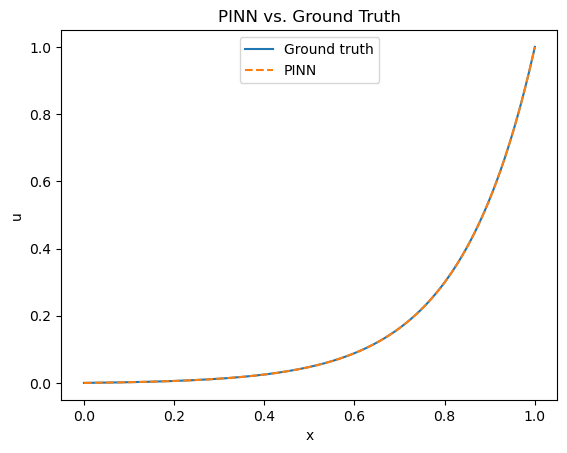

In [9]:
# plot & mse
plt.plot(x, labels_pde, label = "Ground truth"); plt.plot(x, u, '--', label = "PINN");
plt.legend(loc='upper center'); plt.title('PINN vs. Ground Truth'); plt.xlabel('x'); plt.ylabel('u');
jnp.mean(jnp.square(labels_pde - u))

Write PINN prediction & ground truth to file

In [10]:
#np.save('diffusion_cma_60s', (u, labels_pde))